<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [60]:
import psycopg2
import urllib.parse as req
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import Image
import plotly.graph_objects as go
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
import plotly.io as pio

In [62]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [63]:
# текст запроса
query3_1 = '''SELECT count(*)
           FROM vacancies
'''

In [64]:
# результат запроса
df3_1 = pd.read_sql_query(query3_1, connection)
df3_1

C:\Users\maleja\AppData\Local\Temp\ipykernel_15700\4270881829.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,count
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [65]:
query3_2 = '''SELECT count(*)
           FROM EMPLOYERS
'''

In [66]:
# результат запроса
df3_2 = pd.read_sql_query(query3_2, connection)
df3_2

C:\Users\maleja\AppData\Local\Temp\ipykernel_15700\2754533132.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,count
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [67]:
# текст запроса
query3_3 ='''SELECT count(*)
          FROM AREAS

'''


In [68]:
# результат запроса
df3_3 = pd.read_sql_query(query3_3, connection)
df3_3

C:\Users\maleja\AppData\Local\Temp\ipykernel_15700\3353918921.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,count
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [69]:
# текст запроса
query3_4 ='''SELECT count(*)
          from INDUSTRIES
'''

In [70]:
# результат запроса
df3_4 = pd.read_sql_query(query3_4, connection)
df3_4

C:\Users\maleja\AppData\Local\Temp\ipykernel_15700\463248879.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,count
0,294


**Выводы по предварительному анализу данных**\
При подсчете кол-ва вакансий и регионов, и среднего кол-во вакансий на один регион (49197/1362≈36) можно заметить, что вывод черезвычайно мал для регионов с городами-миллионниками. Предварительно можно понять, что вакансии распределены не равномерно, и в большом количестве регионов кол-во вакансий близко к 0

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [71]:
# текст запроса
query4_1 = '''SELECT 
            a.name,
            count(*)
           
           from vacancies v
           join areas a on area_id = a.id
           
           group by 1
           order by 2 desc

'''


In [72]:
# результат запроса
df4_1 = pd.read_sql_query(query4_1, connection)
df4_1

C:\Users\maleja\AppData\Local\Temp\ipykernel_15700\522597837.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,name,count
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892
...,...,...
764,Тарко-Сале,1
765,Новоаннинский,1
766,Бирск,1
767,Сасово,1


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [73]:
# текст запроса
query4_2 = '''SELECT count(*)
           from vacancies
           where salary_from is not null
           or salary_to is not null
'''

In [74]:
# результат запроса
df4_2 = pd.read_sql_query(query4_2, connection)
df4_2

C:\Users\maleja\AppData\Local\Temp\ipykernel_15700\416632072.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,count
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [75]:
# текст запроса
query4_3 = '''SELECT 
           round(avg(salary_from)) low_avg_salary,
           round(avg(salary_to)) hight_avg_salaty
           from vacancies

'''

In [76]:
# результат запроса
df4_3 = pd.read_sql_query(query4_3, connection)
df4_3

C:\Users\maleja\AppData\Local\Temp\ipykernel_15700\3778815690.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,low_avg_salary,hight_avg_salaty
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [77]:
# текст запроса
query4_4 = '''SELECT distinct 
           schedule,
           employment,
           count(*)
           from vacancies
           group by 1, 2
           order by 3 desc
'''

In [78]:
# результат запроса
df4_4 = pd.read_sql_query(query4_4, connection)
df4_4

C:\Users\maleja\AppData\Local\Temp\ipykernel_15700\1702959072.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,schedule,employment,count
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [79]:
# текст запроса
query4_5 = '''SELECT 
           experience,
           count(*)
           from vacancies
           group by 1
           order by 2 asc

'''

In [80]:
df4_5 = pd.read_sql_query(query4_5, connection)
df4_5

C:\Users\maleja\AppData\Local\Temp\ipykernel_15700\3405136569.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,experience,count
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


**Детальный анализ вакансий**\
•Детальный анализ подтверждает предварительный вывод по прошлому юниту\
•Мы видим доминирующую тенденцию относительно типа трудоустройства. Это может значить то, что при поиске работы большинство кадров ищут работу для основного и стабильного заработка\
•Также мы видим в вакансиях превалирующие значения для опыта работы 

<BarContainer object of 4 artists>

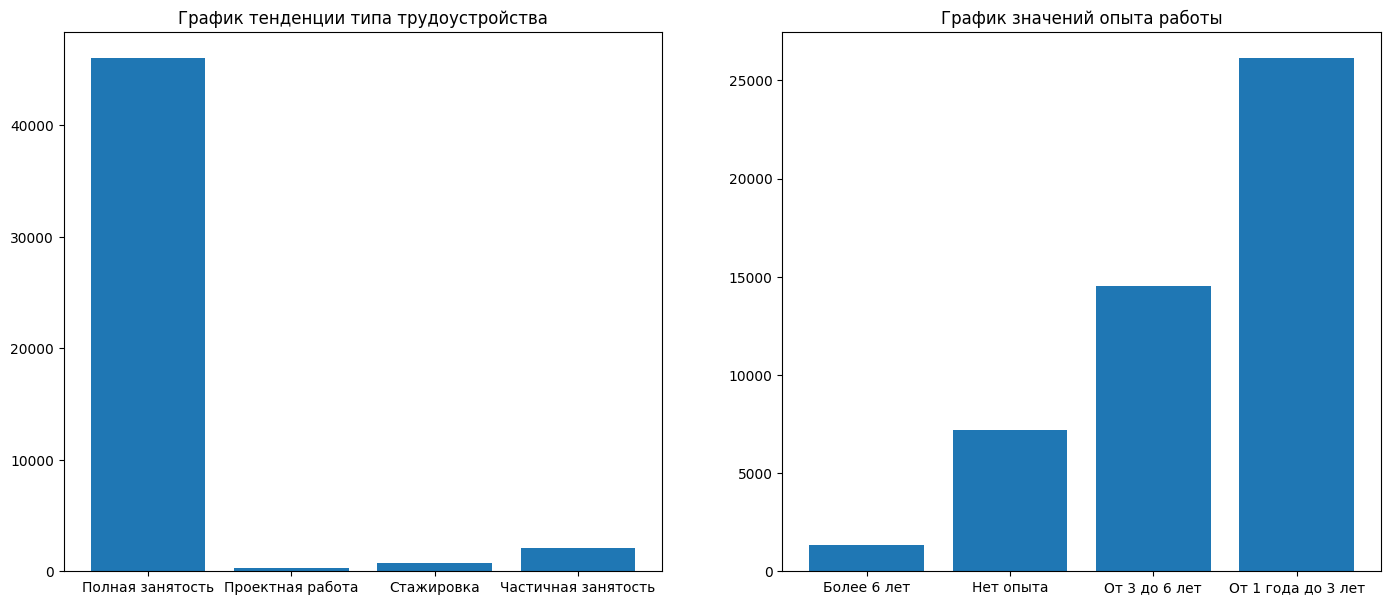

In [81]:
education_median = df4_4.groupby(by='employment', as_index=False)['count'].sum()
#fig = px.bar(education_median, x='employment', y='count', title='График тенденции типа трудоустройства')
#fig.show()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(17, 7))
axes[0].bar(
   x=education_median["employment"],
   height=education_median["count"]
)
axes[0].set_title("График тенденции типа трудоустройства")
axes[1].set_title("График значений опыта работы")

axes[1].bar(
   x=df4_5["experience"],
   height=df4_5["count"]
)

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [82]:
# текст запроса
query5_1 = '''SELECT 
           e.name,
           count(*) count_vacancies
           from vacancies v 
           join employers e on v.employer_id = e.id
           group by 1
           order by 2 desc
'''

In [83]:
# результат запроса
df5_1 = pd.read_sql_query(query5_1, connection)
df5_1.head(15)

C:\Users\maleja\AppData\Local\Temp\ipykernel_15700\1824650250.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,name,count_vacancies
0,Яндекс,1933
1,Ростелеком,491
2,Тинькофф,444
3,СБЕР,428
4,Газпром нефть,331
5,ИК СИБИНТЕК,327
6,МТС,292
7,DataArt,247
8,Совкомбанк Технологии,204
9,Первый Бит,176


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [84]:
query5_2 = '''SELECT 
           a.name,
           count(e.id) cnt_employers,
           count(v.id) cnt_vacancies
           from areas a
           left JOIN employers e on e.area = a.id
           left JOIN vacancies v on v.area_id = e.area
           where v.id is null
           group by 1
           order by 3 asc, 2 desc
           limit 1
'''

In [85]:
# результат запроса
df5_2 = pd.read_sql_query(query5_2, connection)
df5_2

C:\Users\maleja\AppData\Local\Temp\ipykernel_15700\2906167698.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,name,cnt_employers,cnt_vacancies
0,Россия,410,0


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [86]:
# текст запроса
query5_3 = '''SELECT 
           e.name,
           count(distinct area_id)
           from employers e
           JOIN areas a on e.area = a.id
           join vacancies v on e.id = v.employer_id
           group by 1
           order by 2 desc
'''

In [87]:
# результат запросаSELECT 
df5_3 = pd.read_sql_query(query5_3, connection)
df5_3

C:\Users\maleja\AppData\Local\Temp\ipykernel_15700\2348046564.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,name,count
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
...,...,...
14761,UniSol,1
14762,UNISTORY LLC,1
14763,UNIT6,1
14764,United Distribution,1


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [88]:
# текст запроса
query5_4 = '''SELECT count(*)
           from employers e
           left join EMPLOYERS_INDUSTRIES ei on e.id = ei.employer_id
           left join INDUSTRIES i on i.id = ei.industry_id
           where industry_id is null
'''

In [89]:
# результат запроса
df5_4 = pd.read_sql_query(query5_4, connection)
df5_4

C:\Users\maleja\AppData\Local\Temp\ipykernel_15700\210176044.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,count
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [90]:
# текст запроса
query5_5 = '''SELECT
           e.name employers_name
           from employers e
           left join EMPLOYERS_INDUSTRIES ei on e.id = ei.employer_id
           left join INDUSTRIES i on i.id = ei.industry_id
           group by 1
           having count(i.id) = 4
           order by e.name asc
           offset 2 limit 1
'''

In [91]:
# результат запроса
df5_5 = pd.read_sql_query(query5_5, connection)
df5_5


C:\Users\maleja\AppData\Local\Temp\ipykernel_15700\2380884726.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,employers_name
0,2ГИС


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [92]:
# текст запроса
query5_6 = '''SELECT 
           count(e.name)
           from employers e
           left join EMPLOYERS_INDUSTRIES ei on ei.employer_id = e.id
           left join INDUSTRIES i on i.id = ei.industry_id
           where i.name like '%Разработка программного обеспечения%'
'''

In [93]:
# результат запроса
df5_6 = pd.read_sql_query(query5_6, connection)
df5_6

C:\Users\maleja\AppData\Local\Temp\ipykernel_15700\2420594000.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,count
0,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [94]:
# код для получения списка городов-милионников
path_common = req.urlparse('https://ru.wikipedia.org/wiki/Города-миллионеры_России#Список_городов-миллионеров')
url = path_common.scheme + '://' + req.quote(path_common.netloc) +  req.quote(path_common.path) + '#'+ req.quote(path_common.fragment)
cities = tuple(pd.read_html(url)[1]['Город'])

In [95]:
# текст запроса
query5_7 = f'''with reg_vac as (
            SELECT
            a.name region_name,
            count(v.id) vacancies_count
            from VACANCIES v
            left join areas a on a.id = v.area_id
            left join EMPLOYERS e on e.id = v.employer_id
            where e.name = 'Яндекс' and a.name in {cities}
            group by 1
)
            select
            rv.region_name,
            rv.vacancies_count
            from reg_vac rv
            UNION ALL
            SELECT
            'Total' region_name,
            sum(vacancies_count) total_vacancies
            from reg_vac rv
            order by 2 
'''

In [96]:
# результат запроса
df5_7 = pd.read_sql_query(query5_7, connection)
df5_7

C:\Users\maleja\AppData\Local\Temp\ipykernel_15700\1345332424.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,region_name,vacancies_count
0,Омск,21.0
1,Челябинск,22.0
2,Красноярск,23.0
3,Волгоград,24.0
4,Пермь,25.0
5,Казань,25.0
6,Ростов-на-Дону,25.0
7,Самара,26.0
8,Уфа,26.0
9,Краснодар,30.0


***

**Выводы по анализу работодателей**\
•При анализе работодателей мы могли заметить доминирующее присутствие ряда компаний\
•Также можем наблюдать кол-во регионов, в которых компании готовы размещать вакансии

In [97]:
fig = px.treemap(
    data_frame=df5_1.head(100),
    path=['name'],
    values='count_vacancies',
    height=700,
    width=1200,
    title='Присутствие компаний на рынке(топ 100)'
)
fig.show()

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [98]:
# текст запроса
query6_1 = '''SELECT count(*)
           from vacancies
           where name iLIKE '%data%'
           or name iLIKE '%данн%'
'''

In [99]:
# результат запроса
df = pd.read_sql_query(query6_1, connection)
df

C:\Users\maleja\AppData\Local\Temp\ipykernel_15700\4288658687.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,count
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [100]:
# текст запроса
query6_2 = '''select count(*)
              from vacancies
              where (name ilike '%data_scientist%'
              or name ilike '%data_science%'
              or name ilike '%исследователь_данных%'
              or (name like '%ML%' and name not like '%HTML%')
              or name ilike '%machine_learning%'
              or name ilike '%машинн%обучен%')
              and (name ilike '%junior%' or experience = 'Нет опыта' or employment = 'Стажировка')
'''

In [101]:
# результат запроса
df6_2 = pd.read_sql_query(query6_2, connection)
df6_2

C:\Users\maleja\AppData\Local\Temp\ipykernel_15700\4141456713.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,count
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [102]:
# текст запроса
query6_3 = '''select count(*)
              from vacancies
              where (name ilike '%data_scientist%'
              or name ilike '%data_science%'
              or name ilike '%исследователь_данных%'
              or (name like '%ML%' and name not like '%HTML%')
              or name ilike '%machine_learning%'
              or name ilike '%машинн%обучен%')
              and (key_skills ilike '%SQL%' or key_skills ilike '%postgres%')
'''

In [103]:
# результат запроса
df6_3 = pd.read_sql_query(query6_3, connection)
df6_3

C:\Users\maleja\AppData\Local\Temp\ipykernel_15700\1016452198.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,count
0,201


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [104]:
# текст запроса
query6_4 = '''select count(*)
              from vacancies
              where (name ilike '%data_scientist%'
              or name ilike '%data_science%'
              or name ilike '%исследователь_данных%'
              or (name like '%ML%' and name not like '%HTML%')
              or name ilike '%machine_learning%'
              or name ilike '%машинн%обучен%')
              and key_skills ilike '%python%'
'''

In [105]:
# результат запроса
df6_4 = pd.read_sql_query(query6_4, connection)
df6_4

C:\Users\maleja\AppData\Local\Temp\ipykernel_15700\1720163166.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,count
0,351


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [106]:
# текст запроса
query6_5 = '''select round(avg(length(key_skills) - length(replace(key_skills, CHR(9), '')) + 1),2)
              from vacancies
              where (name ilike '%data_scientist%'
              or name ilike '%data_science%'
              or name ilike '%исследователь_данных%'
              or (name like '%ML%' and name not like '%HTML%')
              or name ilike '%machine_learning%'
              or name ilike '%машинн%обучен%')
              and key_skills is not null
'''

In [107]:
# результат запроса
df6_5 = pd.read_sql_query(query6_5, connection)
df6_5

C:\Users\maleja\AppData\Local\Temp\ipykernel_15700\2816704726.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,round
0,6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [108]:
# текст запроса
query6_6 = '''select 
              experience,
              round(avg(coalesce(salary_from, salary_to)/2 + coalesce(salary_to, salary_from)/2),0)
              from vacancies
              where (name ilike '%data_scientist%'
              or name ilike '%data_science%'
              or name ilike '%исследователь_данных%'
              or (name like '%ML%' and name not like '%HTML%')
              or name ilike '%machine_learning%'
              or name ilike '%машинн%обучен%')
              and (salary_from is not null or salary_to is not null)
              group by 1
              
'''

In [109]:
# результат запроса
df6_6 = pd.read_sql_query(query6_6, connection)
df6_6

C:\Users\maleja\AppData\Local\Temp\ipykernel_15700\3610576656.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,experience,round
0,Нет опыта,74643.0
1,От 1 года до 3 лет,139675.0
2,От 3 до 6 лет,243115.0


**Выводы по предметному анализу**
* При углубленном предметном анализе, мы выяснили кол-во вакансия затрагивающих сферу деятельности DS специалистов
* Также нашли кол-во вакансий DS для джунов
* Вычислили среднюю зп для категориального признака опыта работы. В дальнейшем при поиске работы можно ориентироваться на эти данные
* Можем вычислить в процентах, какую часть занимают вакансии DS и DS junior


***

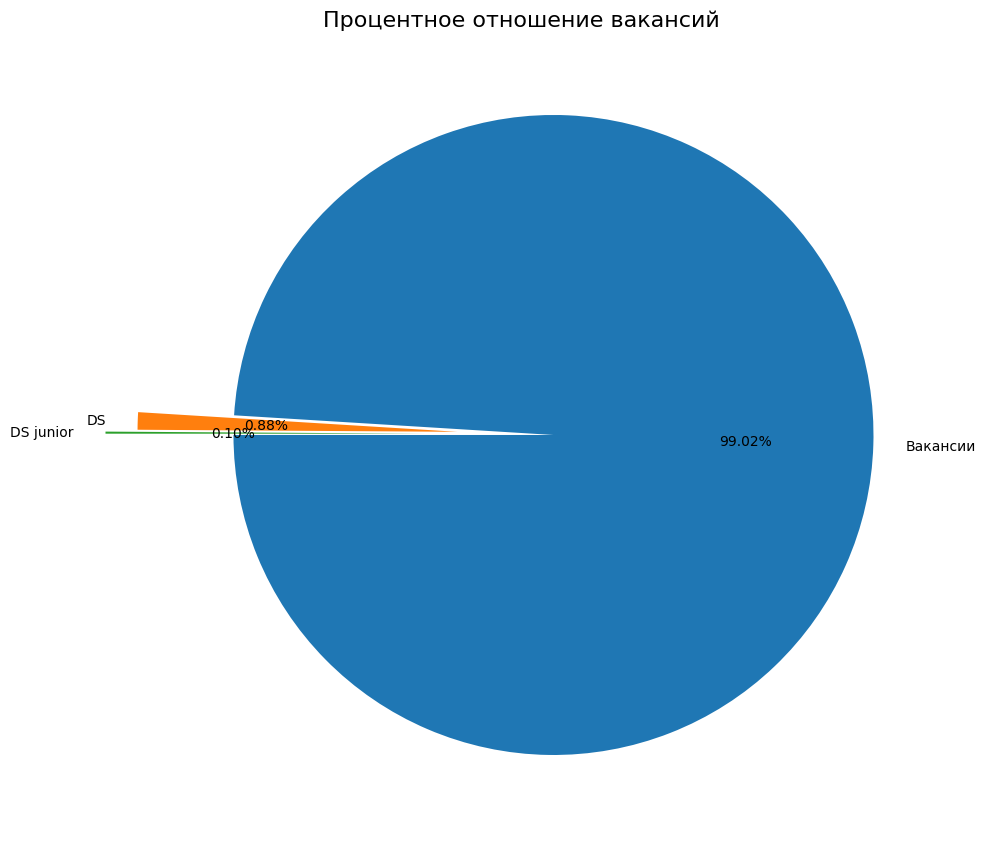

In [115]:
vac = pd.DataFrame({
    'name': ['Вакансии', 'DS', 'DS junior'],
    'vac_count': [48715, 431, 51],
})

fig = plt.figure(figsize=(13, 8))
ax = fig.add_axes((1, 1, 1, 1))
pie = ax.pie(
    vac['vac_count'],
    labels=vac['name'],
    autopct='%1.2f%%',
    explode = [0.1, 0.2, 0.3],
    startangle=900
)
title = ax.set_title('Процентное отношение вакансий', fontsize=16)
plt.show(pie)

# Общий вывод по проекту

* Предварительный анализ предоставляет нам общую картину представленных данных....
* Детальный анализ позволяет узнать обобщенные зависимости, средние значения вакансий, вне зависимости от сферы деятельности компаний
* Анализ работодателей дает понятие о размере компаний и их влиянии на географические регионы
* Предметный анализ создает общее понимание о вакансиях, нацеленных на конкретую сферу деятельности. По содержанию, это самый информативный анализ, используемый в данном случае


In [111]:
query_ex = '''select a.name areas,
              count(*) count
              from vacancies v
              join areas a on v.area_id = a.id
              where (v.name ilike '%data_scientist%'
              or v.name ilike '%data_science%'
              or v.name ilike '%исследователь_данных%'
              or (v.name like '%ML%' and v.name not like '%HTML%')
              or v.name ilike '%machine_learning%'
              or v.name ilike '%машинн%обучен%')
              and (v.name ilike '%junior%' or experience = 'Нет опыта' or employment = 'Стажировка')
              group by 1
              order by 2 desc
'''
df = pd.read_sql_query(query_ex, connection)
fig = px.bar(
    data_frame=df,
    x="areas",
    y="count",
    color='areas',
    text = 'count',
    orientation='v',
    height=500,
    width=1000,
    title=' junior vacancies in the regions'
)

#отображаем его
fig.show()


C:\Users\maleja\AppData\Local\Temp\ipykernel_15700\3500098794.py:15: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [112]:
connection.close()